Install required packages




In [1]:
print("=" * 70)
print("STEP 1: Installing Libraries...")
print("=" * 70)
!pip install openpyxl xgboost -q
!pip install lazypredict --no-deps -q
!pip install scikit-learn lightgbm -q
print("✅ Installation completed!\n")

STEP 1: Installing Libraries...
✅ Installation completed!



Import libraries

In [2]:
print("=" * 70)
print(" Importing Libraries...")
print("=" * 70)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                               GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

try:
    from lazypredict.Supervised import LazyClassifier
    lazy_available = True
except:
    lazy_available = False

import warnings
warnings.filterwarnings('ignore')
print("All libraries imported!\n")


 Importing Libraries...
All libraries imported!



**Upload File**

In [5]:
print("=" * 70)
print(" Upload Dataset")
print("=" * 70)
print("Please select 'default of credit card clients.xls'\n")
uploaded = files.upload()
print("\n File uploaded!\n")

 Upload Dataset
Please select 'default of credit card clients.xls'



Saving default of credit card clients.xls to default of credit card clients (1).xls

 File uploaded!



Load Data

In [6]:
print("=" * 70)
print("Loading Dataset")
print("=" * 70)
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, header=1)
print(f" Dataset loaded! Shape: {df.shape}")
print(f"\nFirst 3 rows:")
print(df.head(3))
print(f"\nColumns: {df.columns.tolist()}\n")

Loading Dataset
 Dataset loaded! Shape: (30000, 25)

First 3 rows:
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  

[3 rows x 25 columns]

Columns: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'M

Prepare X and y

In [7]:
print("=" * 70)
print(" Preparing Features and Target")
print("=" * 70)
possible_targets = ['default payment next month', 'default.payment.next.month',
                   'default', 'Y', 'target']
target_col = None
for col in possible_targets:
    if col in df.columns:
        target_col = col
        break
if target_col is None:
    for col in df.columns:
        if 'default' in col.lower():
            target_col = col
            break

print(f"✅ Target: '{target_col}'")
print(f"Target distribution:\n{df[target_col].value_counts()}\n")

cols_to_drop = ['ID', target_col]
X = df.drop([col for col in cols_to_drop if col in df.columns], axis=1)
y = df[target_col]
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}\n")

 Preparing Features and Target
✅ Target: 'default payment next month'
Target distribution:
default payment next month
0    23364
1     6636
Name: count, dtype: int64

Features shape: (30000, 23)
Target shape: (30000,)



Train-Test Split

In [8]:
print("=" * 70)
print(" Train-Test Split (80/20)")
print("=" * 70)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f" Training set: {X_train.shape}")
print(f" Test set: {X_test.shape}\n")

 Train-Test Split (80/20)
 Training set: (24000, 23)
 Test set: (6000, 23)



Standardization

In [9]:
print("=" * 70)
print(" Standardizing Data")
print("=" * 70)
print(f"BEFORE - Mean: {X_train.mean().mean():.2f}, Std: {X_train.std().mean():.2f}")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"AFTER  - Mean: {X_train_scaled.mean():.6f}, Std: {X_train_scaled.std():.6f}")
print("Standardization completed!\n")

 Standardizing Data
BEFORE - Mean: 20342.83, Std: 27310.48
AFTER  - Mean: 0.000000, Std: 1.000000
Standardization completed!



Train 10 Models

In [10]:
print("=" * 70)
print(" Training 10 Classification Models")
print("=" * 70)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

results = {}
for i, (name, model) in enumerate(models.items(), 1):
    print(f"[{i}/10] Training {name}...", end=" ")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n ACCURACY RANKING:")
for rank, (name, acc) in enumerate(sorted(results.items(), key=lambda x: x[1], reverse=True), 1):
    bar = "█" * int(acc * 50)
    print(f"{rank:2d}. {name:.<25} {acc:.4f} ({acc*100:.2f}%) {bar}")


 Training 10 Classification Models
[1/10] Training Logistic Regression... 0.8077 (80.77%)
[2/10] Training Decision Tree... 0.7152 (71.52%)
[3/10] Training Random Forest... 0.8117 (81.17%)
[4/10] Training SVM... 0.8160 (81.60%)
[5/10] Training KNN... 0.7928 (79.28%)
[6/10] Training Naive Bayes... 0.7525 (75.25%)
[7/10] Training AdaBoost... 0.8167 (81.67%)
[8/10] Training Gradient Boosting... 0.8183 (81.83%)
[9/10] Training Extra Trees... 0.8077 (80.77%)
[10/10] Training XGBoost... 0.8118 (81.18%)

 ACCURACY RANKING:
 1. Gradient Boosting........ 0.8183 (81.83%) ████████████████████████████████████████
 2. AdaBoost................. 0.8167 (81.67%) ████████████████████████████████████████
 3. SVM...................... 0.8160 (81.60%) ████████████████████████████████████████
 4. XGBoost.................. 0.8118 (81.18%) ████████████████████████████████████████
 5. Random Forest............ 0.8117 (81.17%) ████████████████████████████████████████
 6. Logistic Regression...... 0.8077 (80.77%

LazyClassifier

In [ ]:
print("\n" + "=" * 70)
print("STEP 9: Running LazyClassifier")
print("=" * 70)
if lazy_available:
    try:
        print(" Training multiple models (may take 2-3 minutes)...")
        X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
        X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models_lazy, predictions = clf.fit(X_train_df, X_test_df, y_train, y_test)
        print("\n LazyClassifier Results (Top 10):")
        print(models_lazy.head(10))
    except Exception as e:
        print(f" LazyClassifier error: {str(e)}")
else:
    print(" LazyClassifier not available")


STEP 9: Running LazyClassifier
 Training multiple models (may take 2-3 minutes)...


  0%|          | 0/32 [00:00<?, ?it/s]

Visualization


STEP 10: Creating Visualization
 Upload Dataset
Please select 'default of credit card clients.xls'



Saving default of credit card clients.xls to default of credit card clients (2).xls

 File uploaded!

 Loading Dataset
 Dataset loaded! Shape: (30000, 25)
 Model training for visualization completed!



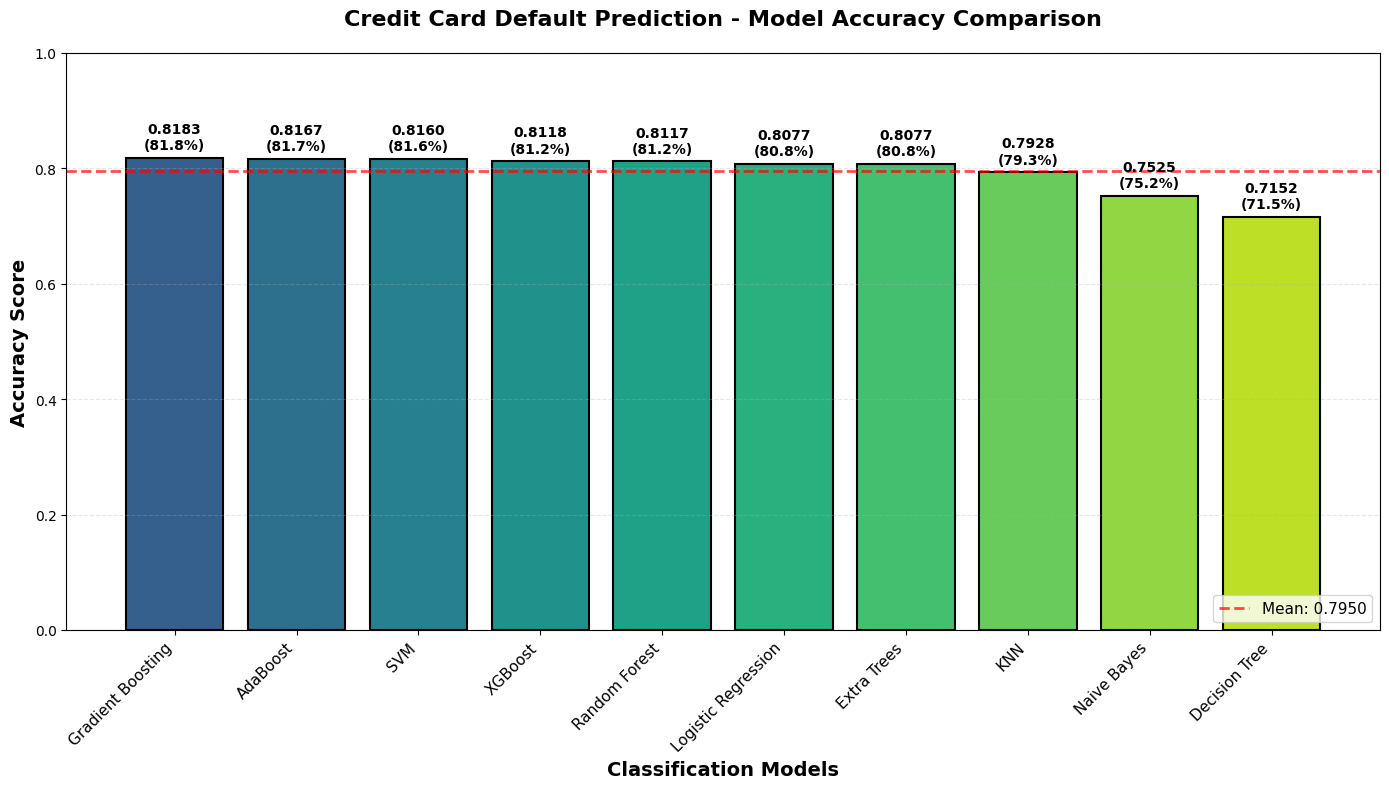

In [8]:
print("\n" + "=" * 70)
print("STEP 10: Creating Visualization")
print("=" * 70)

# Import necessary libraries and classes
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                               GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Assuming X_train_scaled and X_test_scaled might be used as DataFrames
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import files


# Upload File (copied from cell NMALyNkJc1xS)
print(" Upload Dataset")
print("Please select 'default of credit card clients.xls'\n")
uploaded = files.upload()
print("\n File uploaded!\n")

# Load Data (copied from cell 7IRyVP6WdBwP)
print(" Loading Dataset")
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, header=1)
print(f" Dataset loaded! Shape: {df.shape}")


# Prepare X and y (copied from cell 6Z3bZzhCdIYn)
possible_targets = ['default payment next month', 'default.payment.next.month',
                   'default', 'Y', 'target']
target_col = None
for col in possible_targets:
    if col in df.columns:
        target_col = col
        break
if target_col is None:
    for col in df.columns:
        if 'default' in col.lower():
            target_col = col
            break

cols_to_drop = ['ID', target_col]
X = df.drop([col for col in cols_to_drop if col in df.columns], axis=1)
y = df[target_col]


# Train-Test Split (copied from cell njEAHXt0Dlse)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization (copied from cell Ika_fyk5dc_f)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42)
}

results = {}
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
print(" Model training for visualization completed!\n")


sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(sorted_results)))
bars = plt.bar(range(len(sorted_results)), list(sorted_results.values()),
               color=colors, edgecolor='black', linewidth=1.5)

plt.xlabel('Classification Models', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=14, fontweight='bold')
plt.title('Credit Card Default Prediction - Model Accuracy Comparison',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(range(len(sorted_results)), list(sorted_results.keys()),
           rotation=45, ha='right', fontsize=11)
plt.ylim(0, 1.0)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for bar, (name, acc) in zip(bars, sorted_results.items()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.4f}\n({acc*100:.1f}%)',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

mean_accuracy = np.mean(list(sorted_results.values()))
plt.axhline(y=mean_accuracy, color='red', linestyle='--', linewidth=2,
            alpha=0.7, label=f'Mean: {mean_accuracy:.4f}')
plt.legend(loc='lower right', fontsize=11)
plt.tight_layout()
plt.show()

FINAL SUMMARY

In [9]:
print("\n" + "=" * 70)
print(" FINAL SUMMARY")
print("=" * 70)
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)
print(f" Best Model:  {best_model} - {results[best_model]:.4f} ({results[best_model]*100:.2f}%)")
print(f" Worst Model: {worst_model} - {results[worst_model]:.4f} ({results[worst_model]*100:.2f}%)")
print(f" Average:     {mean_accuracy:.4f} ({mean_accuracy*100:.2f}%)")
print("=" * 70)
print("✅ ANALYSIS COMPLETE!")
print("=" * 70)


 FINAL SUMMARY
 Best Model:  Gradient Boosting - 0.8183 (81.83%)
 Worst Model: Decision Tree - 0.7152 (71.52%)
 Average:     0.7950 (79.50%)
✅ ANALYSIS COMPLETE!
